<a href="https://colab.research.google.com/github/y-patankar/CPSC597/blob/main/CreditCard_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 96% 63.0M/66.0M [00:01<00:00, 55.9MB/s]
100% 66.0M/66.0M [00:01<00:00, 59.6MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
df= pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Preprocessing the "Time" and "Amount" column

In [3]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


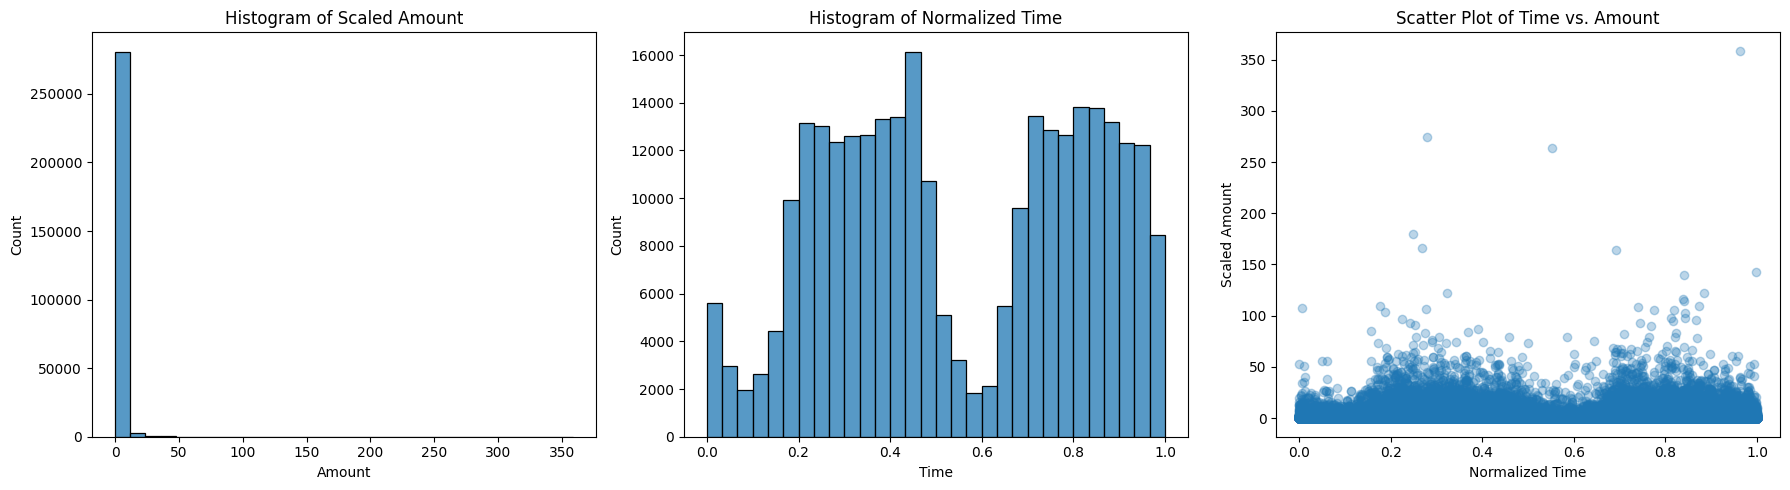

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram for the scaled 'Amount'
sns.histplot(new_df['Amount'], bins=30, ax=axes[0], kde=False)
axes[0].set_title('Histogram of Scaled Amount')

# Histogram for the normalized 'Time'
sns.histplot(new_df['Time'], bins=30, ax=axes[1], kde=False)
axes[1].set_title('Histogram of Normalized Time')

# Scatter plot of 'Time' vs 'Amount'
axes[2].scatter(new_df['Time'], new_df['Amount'], alpha=0.3)
axes[2].set_title('Scatter Plot of Time vs. Amount')
axes[2].set_xlabel('Normalized Time')
axes[2].set_ylabel('Scaled Amount')

plt.tight_layout()
plt.show()


In [5]:
#shuffeling the rows
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [6]:
#split the train, test and validation class
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()


(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [7]:
#panda dataframe to numpy df
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape



((240000, 31), (22000, 31), (22807, 31))

In [8]:
import pandas as pd

# Define the shapes of the datasets
dataset_shapes = {
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Number of Samples': [train_np.shape[0], test_np.shape[0], val_np.shape[0]],
    'Number of Features': [train_np.shape[1], test_np.shape[1], val_np.shape[1]]
}

# Create a DataFrame
df_shapes = pd.DataFrame(dataset_shapes)

# Print the DataFrame
print(df_shapes)


      Dataset  Number of Samples  Number of Features
0    Training             240000                  31
1     Testing              22000                  31
2  Validation              22807                  31


In [9]:
#seperating the features and labels
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

Traning the model with unbalanced dataset.

In [10]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(x_train, y_train.ravel())

predictions = lr.predict(x_val)

# print classification report for validation
print(classification_report(y_val, predictions, target_names=['Not Fraud','Fraud']))
# print(classification_report(y_val,target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction using test data. (unbalanced dataset)

In [ ]:
# print classification report for test data
lr = LogisticRegression()
lr.fit(x_train, y_train.ravel())

predictions = lr.predict(x_test)

print(classification_report(y_test, predictions, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21955
       Fraud       0.91      0.64      0.75        45

    accuracy                           1.00     22000
   macro avg       0.95      0.82      0.88     22000
weighted avg       1.00      1.00      1.00     22000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression()
lr.fit(x_train, y_train.ravel())

predictions = lr.predict(x_test)
auc_score = roc_auc_score(y_test, predictions)

# Generate the classification report with 4 decimal places
report = classification_report(y_test, predictions, target_names=['Not Fraud','Fraud'], digits=4)

# Print classification report and AUC score
print(report)
print("AUC Score:", auc_score)

cm = confusion_matrix(y_test, lr.predict(x_test))

# Print confusion matrix
print("Confusion Matrix for LR before class-balancing:")
print(cm)

              precision    recall  f1-score   support

   Not Fraud     0.9993    0.9999    0.9996     21955
       Fraud     0.9062    0.6444    0.7532        45

    accuracy                         0.9991     22000
   macro avg     0.9528    0.8222    0.8764     22000
weighted avg     0.9991    0.9991    0.9991     22000

AUC Score: 0.8221539006553809
Confusion Matrix for LR before class-balancing:
[[21952     3]
 [   16    29]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cm = confusion_matrix(y_test, lr.predict(x_test))

# Print confusion matrix
print("Confusion Matrix for LR before class-balancing:")
print(cm)

Confusion Matrix for LR before class-balancing:
[[21952     3]
 [   16    29]]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.0484 - accuracy: 0.9928 - val_loss: 0.0081 - val_accuracy: 0.9992
Epoch 2/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0082 - val_accuracy: 0.9992
Epoch 3/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0073 - val_accuracy: 0.9992
Epoch 4/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0080 - val_accuracy: 0.9990
Epoch 5/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0075 - val_accuracy: 0.9990


In [14]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

713/713 [==============================] - 2s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [15]:
def print_confusion_matrix(model, x, y_true, target_names=['Not Fraud', 'Fraud']):
    # Get predictions from the model
    y_pred = neural_net_predictions(model, x)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print confusion matrix



    #classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, target_names=target_names,digits=4))
    print("Confusion Matrix for shallow neural network before class-balancing")
    print(cm)

# Print confusion matrix for validation data
print_confusion_matrix(shallow_nn, x_val, y_val)


713/713 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud     0.9996    0.9994    0.9995     22771
       Fraud     0.6667    0.7778    0.7179        36

    accuracy                         0.9990     22807
   macro avg     0.8332    0.8886    0.8587     22807
weighted avg     0.9991    0.9990    0.9991     22807

Confusion Matrix for shallow neural network before class-balancing
[[22757    14]
 [    8    28]]


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud'],digits=4))
cm_rf = confusion_matrix(y_val, rf.predict(x_val))
print("Confusion Matrix for random forest classifier before class-balancing")
print(cm_rf)

              precision    recall  f1-score   support

   Not Fraud     0.9992    0.9998    0.9995     22771
       Fraud     0.8095    0.4722    0.5965        36

    accuracy                         0.9990     22807
   macro avg     0.9043    0.7360    0.7980     22807
weighted avg     0.9989    0.9990    0.9989     22807

Confusion Matrix for random forest classifier before class-balancing
[[22767     4]
 [   19    17]]


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud'],digits=4))
cm_gb = confusion_matrix(y_val, gbc.predict(x_val))
print("Confusion Matrix for GradientBoostingClassifier before class-balancing")
print(cm_gb)

              precision    recall  f1-score   support

   Not Fraud     0.9995    0.9995    0.9995     22771
       Fraud     0.6667    0.6667    0.6667        36

    accuracy                         0.9989     22807
   macro avg     0.8331    0.8331    0.8331     22807
weighted avg     0.9989    0.9989    0.9989     22807

Confusion Matrix for GradientBoostingClassifier before class-balancing
[[22759    12]
 [   12    24]]


In [18]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud'],digits=4))
cm_svm = confusion_matrix(y_val, svc.predict(x_val))
print("Confusion Matrix for GradientBoostingClassifier before class-balancing")
print(cm_svm)

              precision    recall  f1-score   support

   Not Fraud     0.9996    0.9995    0.9996     22771
       Fraud     0.7000    0.7778    0.7368        36

    accuracy                         0.9991     22807
   macro avg     0.8498    0.8886    0.8682     22807
weighted avg     0.9992    0.9991    0.9991     22807

Confusion Matrix for GradientBoostingClassifier before class-balancing
[[22759    12]
 [    8    28]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 411
Before OverSampling, counts of label '0': 239589 

After OverSampling, the shape of train_X: (479178, 30)
After OverSampling, the shape of train_y: (479178,) 

After OverSampling, counts of label '1': 239589
After OverSampling, counts of label '0': 239589


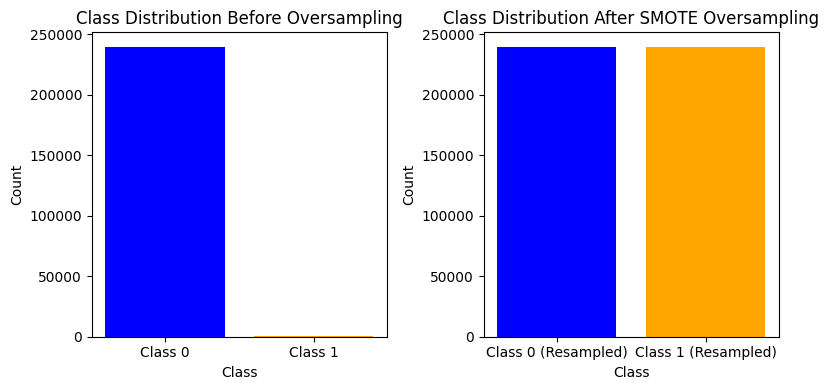

In [22]:
import matplotlib.pyplot as plt

# Define the labels and counts before oversampling
labels_before = ['Class 0', 'Class 1']
counts_before = [sum(y_train == 0), sum(y_train == 1)]

# Define the labels and counts after oversampling
labels_after = ['Class 0 (Resampled)', 'Class 1 (Resampled)']
counts_after = [sum(y_train_res == 0), sum(y_train_res == 1)]

# Create subplots for before and after oversampling with smaller figure size
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize here

# Plot before oversampling
axs[0].bar(labels_before, counts_before, color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Oversampling')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

# Plot after oversampling
axs[1].bar(labels_after, counts_after, color=['blue', 'orange'])
axs[1].set_title('Class Distribution After SMOTE Oversampling')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()



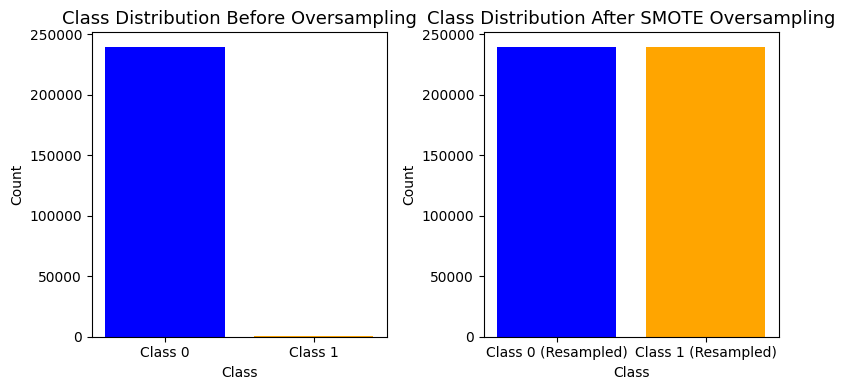

In [25]:
import matplotlib.pyplot as plt

# Define the labels and counts before oversampling
labels_before = ['Class 0', 'Class 1']
counts_before = [sum(y_train == 0), sum(y_train == 1)]

# Define the labels and counts after oversampling
labels_after = ['Class 0 (Resampled)', 'Class 1 (Resampled)']
counts_after = [sum(y_train_res == 0), sum(y_train_res == 1)]

# Create subplots for before and after oversampling with smaller figure size
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize here

# Plot before oversampling
axs[0].bar(labels_before, counts_before, color=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Oversampling', fontsize=13)  # Increase font size here
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')

# Plot after oversampling
axs[1].bar(labels_after, counts_after, color=['blue', 'orange'])
axs[1].set_title('Class Distribution After SMOTE Oversampling', fontsize=13)  # Increase font size here
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


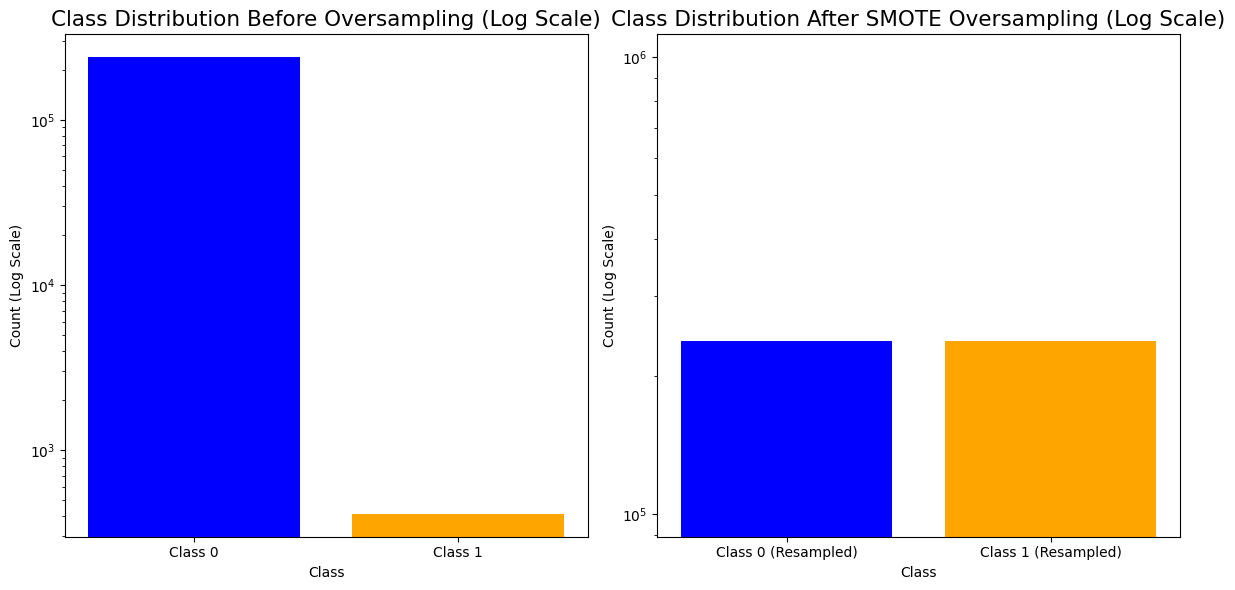

In [29]:
import matplotlib.pyplot as plt

# Define the labels and counts before oversampling
labels_before = ['Class 0', 'Class 1']
counts_before = [sum(y_train == 0), sum(y_train == 1)]

# Define the labels and counts after oversampling
labels_after = ['Class 0 (Resampled)', 'Class 1 (Resampled)']
counts_after = [sum(y_train_res == 0), sum(y_train_res == 1)]

# Create subplots for before and after oversampling with adjusted figure size
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjusted figsize

# Plot before oversampling with log scale
axs[0].bar(labels_before, counts_before, color=['blue', 'orange'])
axs[0].set_yscale('log')  # Set y-axis to log scale
axs[0].set_title('Class Distribution Before Oversampling (Log Scale)', fontsize=15.5)  # Increased font size
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count (Log Scale)')

# Plot after oversampling
axs[1].bar(labels_after, counts_after, color=['blue', 'orange'])
axs[1].set_yscale('log')  # Set y-axis to log scale
axs[1].set_title('Class Distribution After SMOTE Oversampling (Log Scale)', fontsize=15.5)  # Increased font size
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count (Log Scale)')

# Show the plot
plt.tight_layout()
plt.show()


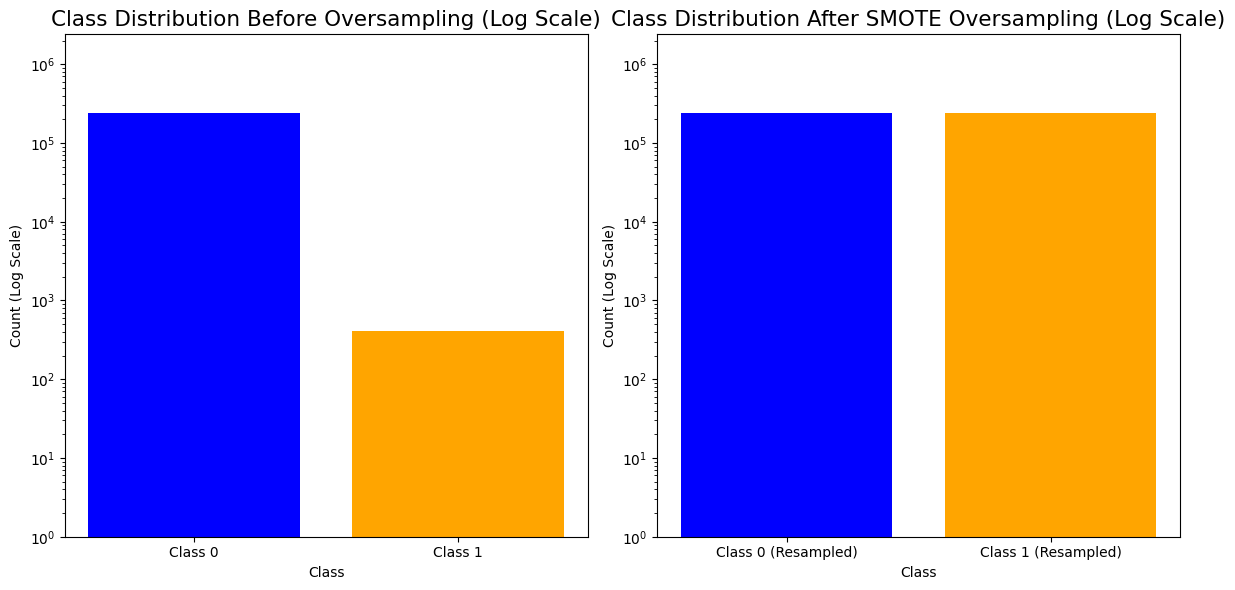

In [30]:
import matplotlib.pyplot as plt

# Define the labels and counts before oversampling
labels_before = ['Class 0', 'Class 1']
counts_before = [sum(y_train == 0), sum(y_train == 1)]

# Define the labels and counts after oversampling
labels_after = ['Class 0 (Resampled)', 'Class 1 (Resampled)']
counts_after = [sum(y_train_res == 0), sum(y_train_res == 1)]

# Determine the maximum count for setting y-axis limits
max_count = max(max(counts_before), max(counts_after))

# Create subplots for before and after oversampling with adjusted figure size
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjusted figsize

# Plot before oversampling with log scale
axs[0].bar(labels_before, counts_before, color=['blue', 'orange'])
axs[0].set_yscale('log')  # Set y-axis to log scale
axs[0].set_title('Class Distribution Before Oversampling (Log Scale)', fontsize=15.5)  # Increased font size
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count (Log Scale)')
axs[0].set_ylim(1, max_count * 10)  # Set y-axis limit based on the maximum count

# Plot after oversampling
axs[1].bar(labels_after, counts_after, color=['blue', 'orange'])
axs[1].set_yscale('log')  # Set y-axis to log scale
axs[1].set_title('Class Distribution After SMOTE Oversampling (Log Scale)', fontsize=15.5)  # Increased font size
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count (Log Scale)')
axs[1].set_ylim(1, max_count * 10)  # Set y-axis limit based on the maximum count

# Show the plot
plt.tight_layout()
plt.show()


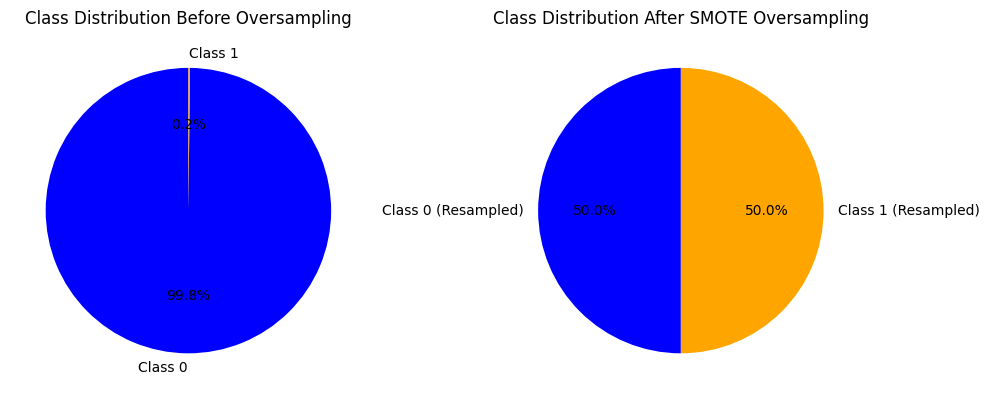

In [ ]:
import matplotlib.pyplot as plt

# Define the counts before and after oversampling
counts_before = [sum(y_train == 0), sum(y_train == 1)]
counts_after = [sum(y_train_res == 0), sum(y_train_res == 1)]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart before oversampling
axs[0].pie(counts_before, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axs[0].set_title('Class Distribution Before Oversampling')

# Pie chart after oversampling
axs[1].pie(counts_after, labels=['Class 0 (Resampled)', 'Class 1 (Resampled)'], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axs[1].set_title('Class Distribution After SMOTE Oversampling')

# Show the plot
plt.tight_layout()
plt.show()


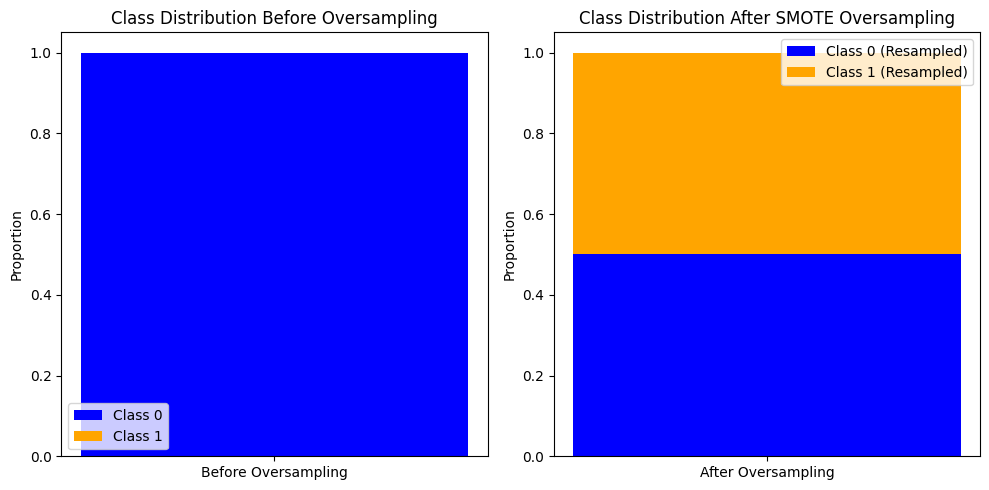

In [ ]:
import matplotlib.pyplot as plt

# Define the counts before and after oversampling
counts_before = [sum(y_train == 0), sum(y_train == 1)]
total_before = sum(counts_before)
proportion_before = [count / total_before for count in counts_before]

counts_after = [sum(y_train_res == 0), sum(y_train_res == 1)]
total_after = sum(counts_after)
proportion_after = [count / total_after for count in counts_after]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Stacked bar chart before oversampling
axs[0].bar(['Before Oversampling'], [proportion_before[0]], label='Class 0', color='blue')
axs[0].bar(['Before Oversampling'], [proportion_before[1]], bottom=[proportion_before[0]], label='Class 1', color='orange')
axs[0].set_ylabel('Proportion')
axs[0].set_title('Class Distribution Before Oversampling')
axs[0].legend()

# Stacked bar chart after oversampling
axs[1].bar(['After Oversampling'], [proportion_after[0]], label='Class 0 (Resampled)', color='blue')
axs[1].bar(['After Oversampling'], [proportion_after[1]], bottom=[proportion_after[0]], label='Class 1 (Resampled)', color='orange')
axs[1].set_ylabel('Proportion')
axs[1].set_title('Class Distribution After SMOTE Oversampling')
axs[1].legend()

plt.tight_layout()
plt.show()


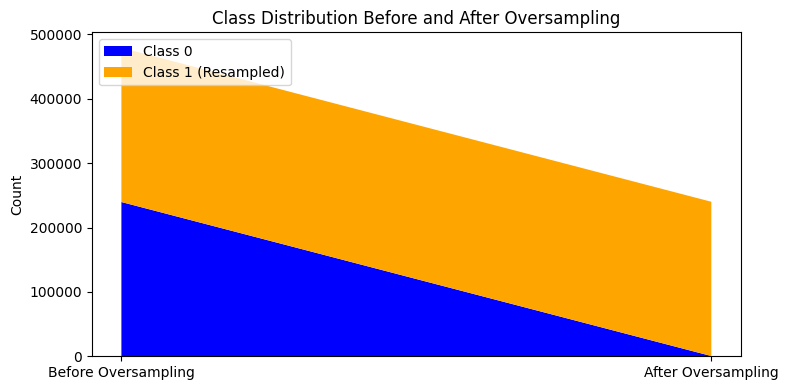

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Before Oversampling', 'After Oversampling']
values = [counts_before, counts_after]

# Create area chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.stackplot(categories, values, labels=['Class 0', 'Class 1 (Resampled)'], colors=['blue', 'orange'])
ax.set_title('Class Distribution Before and After Oversampling')
ax.set_ylabel('Count')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
pip install squarify


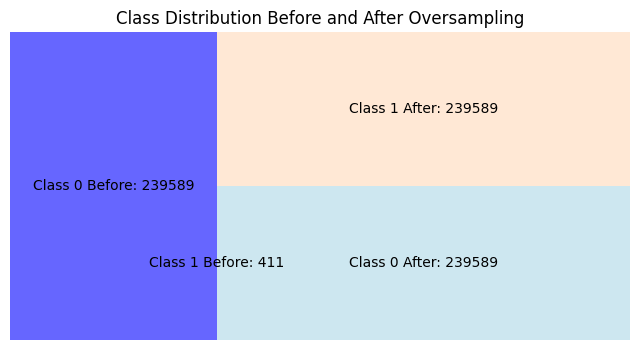

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Plot data
labels = ['Class 0 Before: ' + str(counts_before[0]), 'Class 1 Before: ' + str(counts_before[1]),
          'Class 0 After: ' + str(counts_after[0]), 'Class 1 After: ' + str(counts_after[1])]
sizes = counts_before + counts_after
colors = ['blue', 'orange', 'lightblue', 'peachpuff']

# Create treemap
plt.figure(figsize=(8, 4))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6)
plt.title('Class Distribution Before and After Oversampling')
plt.axis('off')  # Disable axes

plt.show()


Traning the model using balanced dataset.

In [31]:
#classification after smote
lr_smote = LogisticRegression()
lr_smote.fit(X_train_res, y_train_res.ravel())
predictions = lr_smote.predict(x_test)

# print(classification_report(y_test, predictions))
print(classification_report(y_test, predictions, target_names=['Not Fraud','Fraud'],digits=4))
cm = confusion_matrix(y_test, lr_smote.predict(x_test))

# Print confusion matrix
print("Confusion Matrix LR model after SMOTE")
print(cm)

              precision    recall  f1-score   support

   Not Fraud     0.9998    0.9753    0.9874     21955
       Fraud     0.0702    0.9111    0.1304        45

    accuracy                         0.9751     22000
   macro avg     0.5350    0.9432    0.5589     22000
weighted avg     0.9979    0.9751    0.9856     22000

Confusion Matrix LR model after SMOTE
[[21412   543]
 [    4    41]]


In [32]:
import joblib


joblib.dump(lr_smote, 'lr_smote.pkl')

['lr_smote.pkl']

In [34]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib

# Assuming 'model' is your trained model
# Save the model to a specific path on your Google Drive
joblib.dump(lr_smote, '/content/drive/MyDrive/CPSC-597/lr_smote.pkl')



['/content/drive/MyDrive/CPSC-597/lr_smote.pkl']

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train_res.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
shallow_nn.fit(X_train_res, y_train_res, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
14975/14975 [==============================] - 65s 4ms/step - loss: 0.1569 - accuracy: 0.9376 - val_loss: 0.0812 - val_accuracy: 0.9749
Epoch 2/5
14975/14975 [==============================] - 54s 4ms/step - loss: 0.1335 - accuracy: 0.9469 - val_loss: 0.0737 - val_accuracy: 0.9798
Epoch 3/5
14975/14975 [==============================] - 66s 4ms/step - loss: 0.1284 - accuracy: 0.9481 - val_loss: 0.0805 - val_accuracy: 0.9766
Epoch 4/5
14975/14975 [==============================] - 62s 4ms/step - loss: 0.1262 - accuracy: 0.9490 - val_loss: 0.0748 - val_accuracy: 0.9791
Epoch 5/5
14975/14975 [==============================] - 32s 2ms/step - loss: 0.1265 - accuracy: 0.9488 - val_loss: 0.0905 - val_accuracy: 0.9730


In [37]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

713/713 [==============================] - 1s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [39]:
def print_confusion_matrix(model, x, y_true, target_names=['Not Fraud', 'Fraud']):
    # Get predictions from the model
    y_pred = neural_net_predictions(model, x)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print confusion matrix
    print("Confusion Matrix for shallow neural network after class-balancing")
    print(cm)


    #classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, target_names=target_names,digits=4))

# Print confusion matrix for validation data
print_confusion_matrix(shallow_nn, x_val, y_val)

713/713 [==============================] - 1s 1ms/step
Confusion Matrix for shallow neural network after class-balancing
[[22160   611]
 [    4    32]]
              precision    recall  f1-score   support

   Not Fraud     0.9998    0.9732    0.9863     22771
       Fraud     0.0498    0.8889    0.0943        36

    accuracy                         0.9730     22807
   macro avg     0.5248    0.9310    0.5403     22807
weighted avg     0.9983    0.9730    0.9849     22807



In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(X_train_res, y_train_res)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud'],digits=4))
cm_rf = confusion_matrix(y_val, rf.predict(x_val))
print("Confusion Matrix for random forest classifier after class-balancing")
print(cm_rf)

              precision    recall  f1-score   support

   Not Fraud     0.9997    0.9981    0.9989     22771
       Fraud     0.3973    0.8056    0.5321        36

    accuracy                         0.9978     22807
   macro avg     0.6985    0.9018    0.7655     22807
weighted avg     0.9987    0.9978    0.9981     22807

Confusion Matrix for random forest classifier after class-balancing
[[22727    44]
 [    7    29]]


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train_res, y_train_res)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud'],digits=4))
cm_gb = confusion_matrix(y_val, gbc.predict(x_val))
print("Confusion Matrix for GradientBoostingClassifier after class-balancing")
print(cm_gb)

              precision    recall  f1-score   support

   Not Fraud     0.9999    0.9758    0.9877     22771
       Fraud     0.0580    0.9444    0.1093        36

    accuracy                         0.9757     22807
   macro avg     0.5290    0.9601    0.5485     22807
weighted avg     0.9984    0.9757    0.9863     22807

Confusion Matrix for GradientBoostingClassifier after class-balancing
[[22219   552]
 [    2    34]]


Untill this point, SMOTE is giving better accuracy in detecting fraud using linear regression(Fraud       0.06      0.92      0.11).
Sequencial neural network has slightly better precision and f1-score, lowering the accuracy of fetecting fraud. But model is significantly good. (0.77      0.87      0.81)




In [ ]:
#implementing autoencoders

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

# Load the credit card transaction dataset
ae_data = pd.read_csv("creditcard.csv")

# Separate features and labels
ae_x = ae_data.drop("Class", axis=1)
ae_y = ae_data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ae_x, ae_y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the autoencoder architecture
input_dim = X_train.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Train the autoencoder on normal transactions
model.fit(X_train[y_train == 0], X_train[y_train == 0],
          epochs=10,
          batch_size=128,
          validation_data=(X_test, X_test))

# Reconstruct the test data and calculate reconstruction error
reconstructed = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
threshold = np.mean(mse) + 2 * np.std(mse)  # Set threshold as mean + 2*std deviation

# Predict fraud based on reconstruction error
y_pred = (mse > threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
1777/1777 [==============================] - 5s 2ms/step - loss: 0.6991 - val_loss: 0.6725
Epoch 2/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6420 - val_loss: 0.6604
Epoch 3/10
1777/1777 [==============================] - 6s 3ms/step - loss: 0.6350 - val_loss: 0.6579
Epoch 4/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6340 - val_loss: 0.6573
Epoch 5/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6335 - val_loss: 0.6570
Epoch 6/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6333 - val_loss: 0.6568
Epoch 7/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6333 - val_loss: 0.6568
Epoch 8/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6332 - val_loss: 0.6571
Epoch 9/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6332 - val_loss: 0.6567
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
[[56419   445

In [ ]:
#implementing autoencoders

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

# Load the credit card transaction dataset
# ae_data = pd.read_csv("creditcard.csv")

# Separate features and labels
# ae_x = ae_data.drop("Class", axis=1)
# ae_y = ae_data["Class"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(ae_x, ae_y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Define the autoencoder architecture
input_dim = X_train.shape[1]

model = tf.keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Train the autoencoder on normal transactions
model.fit(X_train[y_train_res == 0], X_train[y_train_res == 0],
          epochs=10,
          batch_size=128,
          validation_data=(X_test, X_test))

# Reconstruct the test data and calculate reconstruction error
reconstructed = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
threshold = np.mean(mse) + 2 * np.std(mse)  # Set threshold as mean + 2*std deviation

# Predict fraud based on reconstruction error
y_pred = (mse > threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
1872/1872 [==============================] - 8s 4ms/step - loss: 0.3337 - val_loss: 1.2752
Epoch 2/10
1872/1872 [==============================] - 5s 3ms/step - loss: 0.3117 - val_loss: 1.2720
Epoch 3/10
1872/1872 [==============================] - 6s 3ms/step - loss: 0.3049 - val_loss: 1.2483
Epoch 4/10
1872/1872 [==============================] - 6s 3ms/step - loss: 0.3022 - val_loss: 1.2485
Epoch 5/10
1872/1872 [==============================] - 4s 2ms/step - loss: 0.3021 - val_loss: 1.2475
Epoch 6/10
1872/1872 [==============================] - 4s 2ms/step - loss: 0.3020 - val_loss: 1.2474
Epoch 7/10
1872/1872 [==============================] - 6s 3ms/step - loss: 0.3019 - val_loss: 1.2465
Epoch 8/10
1872/1872 [==============================] - 4s 2ms/step - loss: 0.3019 - val_loss: 1.2482
Epoch 9/10
1872/1872 [==============================] - 4s 2ms/step - loss: 0.3015 - val_loss: 1.2434
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
[[56688   176